In [19]:
pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np

from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as pi

In [21]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [22]:
simulator = Aer.get_backend('aer_simulator')

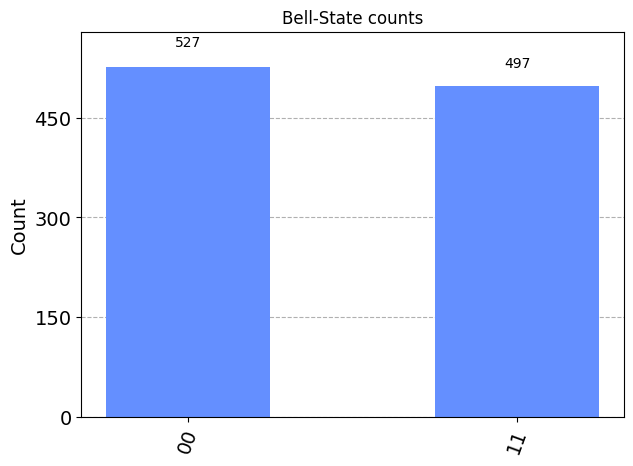

In [23]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.measure_all()

simulator = Aer.get_backend('aer_simulator')
circ =transpile(circ, simulator)

result =simulator.run(circ).result()
counts =result.get_counts(circ)
plot_histogram(counts, title= "Bell-State counts")

In [24]:
result =simulator.run(circ,shots=10, memory=True).result()
memory =result.get_memory(circ)
print(memory)

['00', '11', '00', '00', '11', '00', '11', '00', '11', '00']


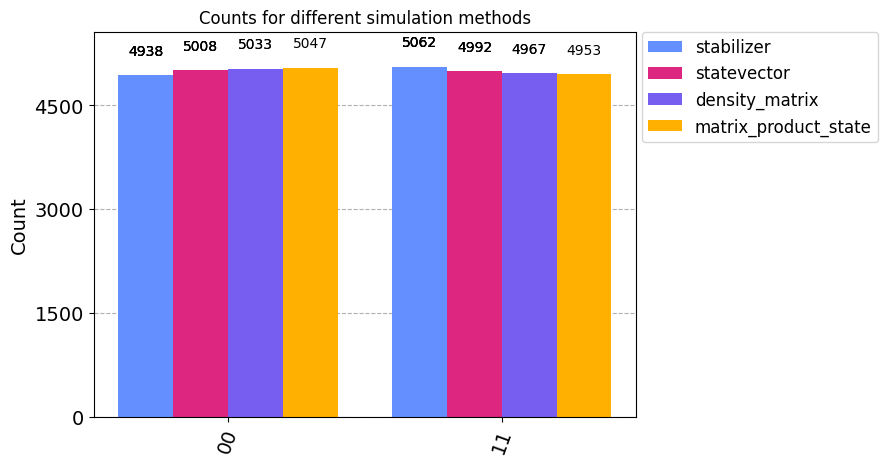

In [25]:
shots = 10000

sim_stabilizer = Aer.get_backend('aer_simulator_stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector =sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

sim_density = Aer.get_backend('aer_simulator_density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

sim_mps = Aer.get_backend('aer_simulator_matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps =job_mps.result().get_counts(0)

plot_histogram([counts_stabilizer, counts_statevector, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=['stabilizer', 'statevector',
                       'density_matrix', 'matrix_product_state'])

In [26]:
from qiskit_aer import AerError

try:
    simulator_gpu = Aer.get_backend('aer_simulator')
    simulator_gpu.set_options(device='GPU')
except AerError as e:
    print(e)

In [27]:
simulator = Aer.get_backend('aer_simulator_statevector')
simulator.set_options(precision='single')

result =simulator.run(circ).result()
counts =result.get_counts(circ)
print(counts)

{'11': 527, '00': 497}


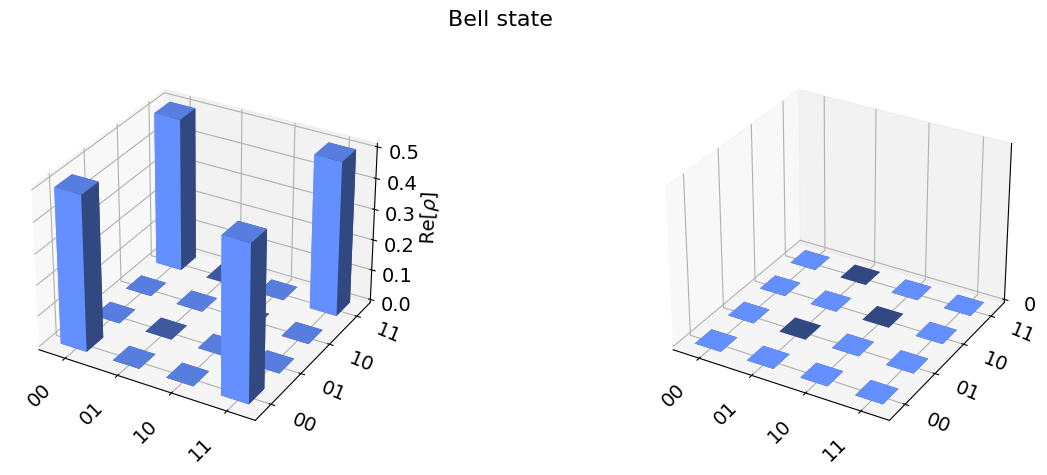

In [30]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_statevector()

simulator = Aer.get_backend('aer_simulator')
circ =transpile(circ, simulator)

result =simulator.run(circ).result()
statevector= result.get_statevector(circ)
plot_state_city(statevector,title='Bell state')

In [31]:
steps = 5
circ = QuantumCircuit(1)
for i in range(steps):
    circ.save_statevector(label=f'psi_{i}')
    circ.rx(i * np.pi / steps, 0)
circ.save_statevector(label=f'psi_{steps}')

simulator = Aer.get_backend('aer_simulator')
circ =transpile(circ, simulator)

result =simulator.run(circ).result()
data =result.data(0)
data

{'psi_0': Statevector([1.+0.j, 0.+0.j],
             dims=(2,)),
 'psi_1': Statevector([1.+0.j, 0.+0.j],
             dims=(2,)),
 'psi_2': Statevector([0.95105652+0.j        , 0.        -0.30901699j],
             dims=(2,)),
 'psi_3': Statevector([0.58778525+0.j        , 0.        -0.80901699j],
             dims=(2,)),
 'psi_4': Statevector([-0.30901699+0.j        ,  0.        -0.95105652j],
             dims=(2,)),
 'psi_5': Statevector([-1.+0.00000000e+00j,  0.-5.55111512e-17j],
             dims=(2,))}

In [36]:
# Generate a random statevector
num_qubits = 2
psi = random_statevector(2 ** num_qubits, seed=100)

# Set initial state to generated statevector
circ = QuantumCircuit(num_qubits)
circ.set_statevector(psi)
circ.save_state()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

NameError: name 'random_statevector' is not defined

In [35]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright